In [1]:
#Import Library (Numpy)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

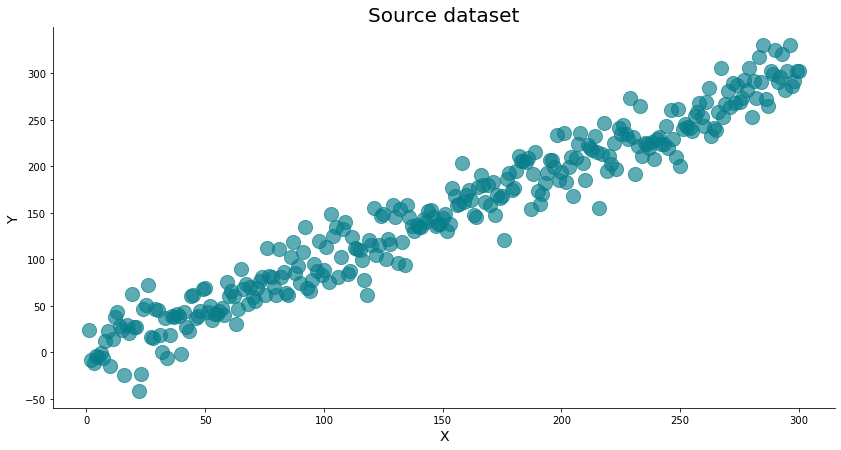

In [3]:
# create some dummy data and visualization

X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [4]:
#For validation sake, we'll split the dataset into training and testing parts:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
 #initialize and train the model, and afterwards make predictions
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [6]:
#Here's how you can get the coefficients
model.b0, model.b1

(-2.1731681353966223, 1.0084850816448976)

In [7]:
# These are the predictions
preds

array([203.55778852, 267.09234866, 152.12504936,   7.91168268,
       233.81234097, 226.7529454 , 196.49839295, 108.76019085,
         3.87774235, 175.32020623, 237.8462813 ,  56.3189666 ,
       218.68506474,  44.21714562, 182.37960181, 221.71051999,
       290.28750554, 211.62566917, 148.09110903, 165.23535542,
        77.49715331, 112.79413117, 249.94810228, 250.95658736,
       103.71776544,  41.19169038, 282.21962489, 296.33841603,
       157.16747476, 238.85476638,  15.97956333, 164.22687034,
        32.11532464,  23.03895891, 215.6596095 , 118.84504166,
         5.89471252,  89.59897429,  45.2256307 ,  72.45472791,
        92.62442954,  75.48018315, 287.2620503 ,  59.34442184,
        76.48866823,  62.36987709, 234.82082605, 229.77840064,
       110.77716101, 231.79537081, 180.36263164, 144.0571687 ,
       239.86325146,  74.47169807, 298.35538619, 279.19416964,
        96.65836987,  91.61594446, 192.46445262,  24.04744399])

In [8]:
#Original and predicted differ, but not much
y_test

array([209.61698093, 305.7216217 , 138.15556064, -15.13854711,
       211.48297163, 234.81673305, 199.40771257,  84.24673005,
        -0.56903521, 121.11529443, 226.39553736,  40.36174771,
       195.16666364,  36.76099055, 206.15178168, 224.511924  ,
       324.71744843, 219.23673666, 138.2671447 , 191.03083153,
        69.66724172, 111.47126596, 200.50377129, 240.17917726,
       134.86582745,  23.14545183, 273.73004062, 330.67015909,
       203.50830669, 207.32049335,  20.49889297, 177.79113989,
        -6.26492871,  50.28821011, 155.43106098, 115.22987678,
        11.9803294 , 107.82759597,  38.8199686 ,  81.09828084,
        65.86005331,  82.28945379, 264.35952862,  66.19469994,
        80.95334434,  46.32814217, 225.17310968, 231.91487969,
       123.42803076, 221.94647482, 194.79968138, 152.68645331,
       228.87776887, 112.10292469, 291.8952589 , 305.44689814,
       119.65339157,  68.8927753 , 181.82360738,  72.06597811])

In [9]:
#calculating RMSE
from sklearn.metrics import mean_squared_error
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

23.380161214149194

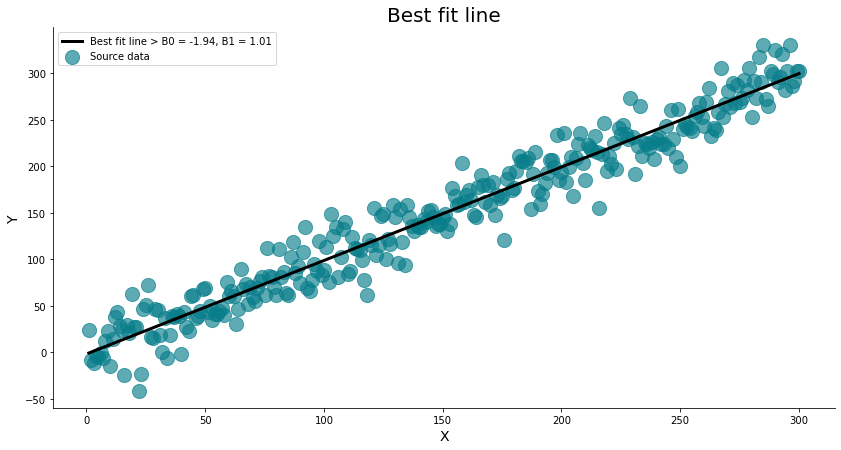

In [10]:
#visualize this line with Matplotlib
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

In [11]:
#Comparison with Scikit-Learn
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))
sk_model.intercept_, sk_model.coef_

(-2.1731681353966223, array([1.00848508]))

In [12]:
#Let's check the RMSE
rmse(y_test, sk_preds)

23.380161214149194